<a href="https://colab.research.google.com/github/jfernandezp/EjemploDataScience/blob/main/DMC_Credit_scoringabc.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

---
<h1 align=center><font size = 5>Credit scoring</font></h1>

---

# Introducción

<h3> Definición del problema y principales necesidades a resolver </h3>
<ul> 
    <li><b>El problema de credit scoring</b> en machine learning consiste en desarrollar un modelo que pueda predecir la probabilidad de que un solicitante de crédito sea capaz de pagar su préstamo. Es decir, se trata de clasificar a los solicitantes en dos categorías: aquellos que son más propensos a pagar su préstamo y aquellos que son menos propensos a hacerlo.</li>
    <li><b>La necesidad principal</b> es ayudar a las instituciones financieras a tomar decisiones más informadas sobre la concesión de préstamos y reducir el riesgo de incumplimiento, lo que puede tener un impacto significativo en su rentabilidad y estabilidad financiera.
    </li>
</ul>
<h4> Entre las necesidades secundarias a resolver </h4>
<ol>
    <li>Identificar y clasificar a los clientes según su riesgo crediticio</li>
    <li>Evaluar la capacidad del cliente para pagar el préstamo</li>
    <li>Predecir la probabilidad de incumplimiento de pago del prestamo</li>
    <li>Mejorar la precisión en la evaluación del riesgo crediticio para evitar morosos y reducir pérdidas para la institución financiera</li>
    <li>Acelerar el proceso de aprobación de préstamos para ofrecer un mejor servicio al cliente</li>
</ol>



In [ ]:
]

SyntaxError: ignored

# Librerias

In [ ]:
# Scikit-Learn 
import sklearn

# Imports comunes
import pandas as pd
import numpy as np


# Configuración de tamaño de gráficos matplotlib
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt

mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# Cargar seaborn 
import seaborn as sns
sns.set(style="whitegrid", color_codes = True)
sns.set(rc={'figure.figsize':(10,6)})

import math

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


<b>Descripción de datos</b>

El data frame de Titanic tiene 148670 filas y 34 columnas.

<b>Este data frame contiene las siguientes columnas:</b>

---

* <b>Year(Año) : </b>  El año en que se otorgó el préstamo
* <b>Loan limit(Límite de prestamo) : </b>  El monto máximo de dinero que un solicitante está autorizado a pedir prestado
* <b>Gender(Género) : </b>  El género del solicitante del préstamo, ya sea conjunto, masculino, femenino o desconocido


---

## 1. Descargar y explorar Dataset

In [ ]:
# Cargar Data
data = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Especializacion_ML_DL/data/Loan_Default.csv")
target = 'Status'
data

,ID,year,loan_limit,Gender,approv_in_adv,loan_type,loan_purpose,Credit_Worthiness,open_credit,business_or_commercial,...,credit_type,Credit_Score,co-applicant_credit_type,age,submission_of_application,LTV,Region,Security_Type,Status,dtir1
0,24890,2019,cf,Sex Not Available,nopre,type1,p1,l1,nopc,nob/c,...,EXP,758,CIB,25-34,to_inst,98.728814,south,direct,1,45.0
1,24891,2019,cf,Male,nopre,type2,p1,l1,nopc,b/c,...,EQUI,552,EXP,55-64,to_inst,NaN,North,direct,1,NaN
2,24892,2019,cf,Male,pre,type1,p1,l1,nopc,nob/c,...,EXP,834,CIB,35-44,to_inst,80.019685,south,direct,0,46.0
3,24893,2019,cf,Male,nopre,type1,p4,l1,nopc,nob/c,...,EXP,587,CIB,45-54,not_inst,69.376900,North,direct,0,42.0
4,24894,2019,cf,Joint,pre,type1,p1,l1,nopc,nob/c,...,CRIF,602,EXP,25-34,not_inst,91.886544,North,direct,0,39.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
148665,173555,2019,cf,Sex Not Available,nopre,type1,p3,l1,nopc,nob/c,...,CIB,659,EXP,55-64,to_inst,71.792763,south,direct,0,48.0
148666,173556,2019,cf,Male,nopre,type1,p1,l1,nopc,nob/c,...,CIB,569,CIB,25-34,not_inst,74.428934,south,direct,0,15.0
148667,173557,2019,cf,Male,nopre,type1,p4,l1,nopc,nob/c,...,CIB,702,EXP,45-54,not_inst,61.332418,North,direct,0,49.0
148668,173558,2019,cf,Female,nopre,type1,p4,l1,nopc,nob/c,...,EXP,737,EXP,55-64,to_inst,70.683453,North,direct,0,29.0


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148670 entries, 0 to 148669
Data columns (total 34 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   ID                         148670 non-null  int64  
 1   year                       148670 non-null  int64  
 2   loan_limit                 145326 non-null  object 
 3   Gender                     148670 non-null  object 
 4   approv_in_adv              147762 non-null  object 
 5   loan_type                  148670 non-null  object 
 6   loan_purpose               148536 non-null  object 
 7   Credit_Worthiness          148670 non-null  object 
 8   open_credit                148670 non-null  object 
 9   business_or_commercial     148670 non-null  object 
 10  loan_amount                148670 non-null  int64  
 11  rate_of_interest           112231 non-null  float64
 12  Interest_rate_spread       112031 non-null  float64
 13  Upfront_charges            10

In [ ]:
# Resumen estadistico 
univariate = data.describe().transpose()
univariate.reset_index(inplace = True)        # quito los indices
univariate.rename(columns = {'index':'feature',   # cambio los nombres
                             '25%': 'Q1',
                             '50%': 'median',
                             '75%': 'Q3'}, inplace = True)

# Creando métricas de las variables
univariate[['missing_rate']] = 1 - univariate[['count']]/data.shape[0]   # evaluo el porcentaje de valores nulos
univariate.sort_values(by = 'missing_rate', ascending = False, inplace = True)  # ordeno del mayor a menor
univariate

,feature,count,mean,std,min,Q1,median,Q3,max,missing_rate
5,Upfront_charges,109028.0,3224.996127,3251.121510,0.000000,581.49000,2596.45000,4812.500000,6.000000e+04,0.266644
4,Interest_rate_spread,112031.0,0.441656,0.513043,-3.638000,0.07600,0.39040,0.775400,3.357000e+00,0.246445
3,rate_of_interest,112231.0,4.045476,0.561391,0.000000,3.62500,3.99000,4.375000,8.000000e+00,0.245100
12,dtir1,124549.0,37.732932,10.545435,5.000000,31.00000,39.00000,45.000000,6.100000e+01,0.162245
7,property_value,133572.0,497893.465696,359935.315562,8000.000000,268000.00000,418000.00000,628000.000000,1.650800e+07,0.101554
10,LTV,133572.0,72.746457,39.967603,0.967478,60.47486,75.13587,86.184211,7.831250e+03,0.101554
8,income,139520.0,6957.338876,6496.586382,0.000000,3720.00000,5760.00000,8520.000000,5.785800e+05,0.061546
6,term,148629.0,335.136582,58.409084,96.000000,360.00000,360.00000,360.000000,3.600000e+02,0.000276
0,ID,148670.0,99224.500000,42917.476598,24890.000000,62057.25000,99224.50000,136391.750000,1.735590e+05,0.000000
1,year,148670.0,2019.000000,0.000000,2019.000000,2019.00000,2019.00000,2019.000000,2.019000e+03,0.000000


In [ ]:
#ANALISIS DEL TARGET
Status_cero = data.loc[data.Status == 0]
Status_uno = data.loc[data.Status == 1]

print("Cantidad de '0'",Status_cero.shape[0], " -> ", round(float(Status_cero.shape[0]/data.shape[0]*100),2),"%")
print("Cantidad de '1'",Status_uno.shape[0], " -> ", round(float(Status_uno.shape[0]/data.shape[0]*100),2),"%")

Cantidad de '0' 112031  ->  75.36 %
Cantidad de '1' 36639  ->  24.64 %


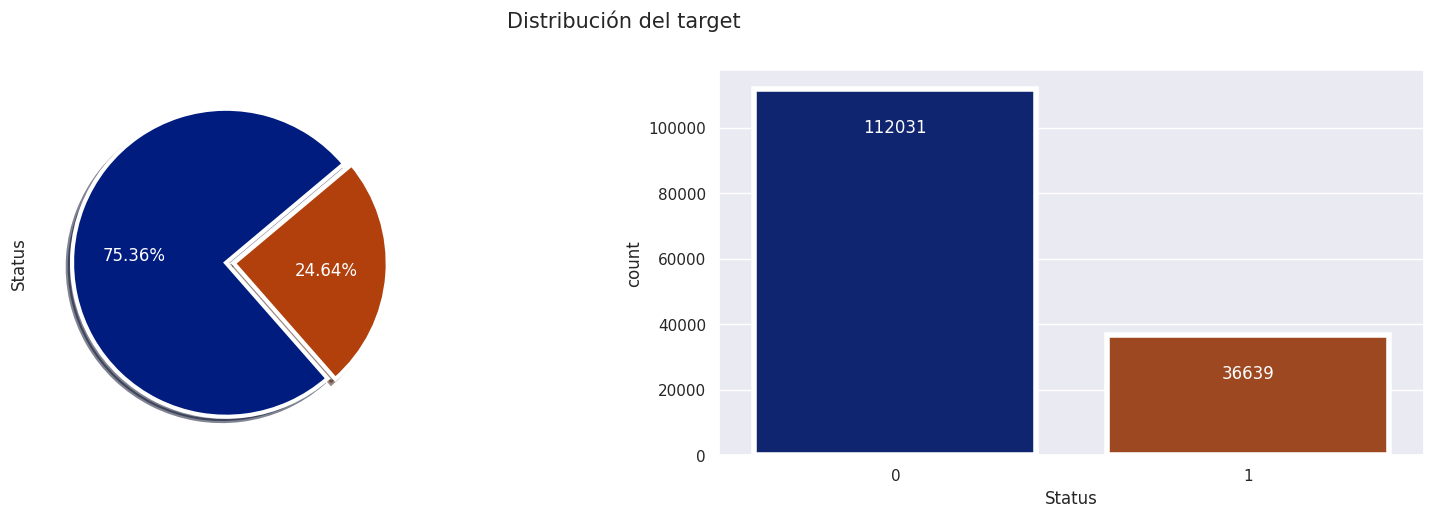

In [ ]:
f,ax= plt.subplots(1,2,figsize=(20,5))
sns.countplot(data = data, x="Status", ax=ax[1],palette='dark',edgecolor='white', linewidth=4)
data.Status.value_counts().plot.pie(autopct='%.2f%%',explode=[0,0.05], ax=ax[0],colors=sns.color_palette('dark'),shadow = 'True',
        startangle = 40,
        textprops = {'color': 'White','fontsize':12},
        wedgeprops = {'linewidth':3,'edgecolor':'white'},
        rotatelabels = 'true')
ax[1].text(x=0,y=100000,s=data["Status"].value_counts()[0], color='white', va='center', ha='center')
ax[1].text(x=1,y=25000,s=data["Status"].value_counts()[1], color='white', va='center', ha='center')
f.suptitle('Distribución del target',y=0.98,ha='center',va='center',size=15, weight=150)
plt.show()

* Notamos una diferencia muy alta y por lo tanto sesgada
* Se tendría que extraer una proporción de los valores de "0" o usar una tecnica para aumentar el peso de la opción "1"

## 2 Análisis exploratorio (EDA)


In [ ]:
# selección de variables categóricas y numericas
df_categoricas = data.select_dtypes(include=['object']).columns.to_list()
df_numericas = data.select_dtypes(include=['float64', 'int64']).columns.to_list()
print("\033[1m" + 'Variables categoricas' + "\033[0m\n", df_categoricas)
print("\033[1m" + 'Variables numericas' + "\033[0m\n", df_numericas)

Variables categoricas
 ['loan_limit', 'Gender', 'approv_in_adv', 'loan_type', 'loan_purpose', 'Credit_Worthiness', 'open_credit', 'business_or_commercial', 'Neg_ammortization', 'interest_only', 'lump_sum_payment', 'construction_type', 'occupancy_type', 'Secured_by', 'total_units', 'credit_type', 'co-applicant_credit_type', 'age', 'submission_of_application', 'Region', 'Security_Type']
Variables numericas
 ['ID', 'year', 'loan_amount', 'rate_of_interest', 'Interest_rate_spread', 'Upfront_charges', 'term', 'property_value', 'income', 'Credit_Score', 'LTV', 'Status', 'dtir1']


### Análisis univariado

In [ ]:
def plot_categorical(data,height):
    '''
    This function plots categorical variables as bar charts wit
    h the % weight of each value on the bar
    '''
    cat_col = [col for col in data.columns if data[col].dtypes=='object']
    f,ax = plt.subplots(int(len(cat_col)/7),7, figsize=(33,20))
    for i in range(len(cat_col)):
        count = data[cat_col[i]].value_counts(normalize=True).reset_index()
        sns.barplot(data=count,x='index',y=cat_col[i], ax=ax[i//7,i%7], edgecolor='white',linewidth=2,palette='dark')
        ax[i//7,i%7].set_xlabel('')
        ax[i//7,i%7].set_ylabel('')
        ax[i//7,i%7].set_title(cat_col[i], size=15)
        ax[i//7,i%7].tick_params('x', labelrotation=30, size=12)
        for j in count.index:
            ax[i//7,i%7].text(x=j,y=count[cat_col[i]][j]+height, s=str(round(count[cat_col[i]][j],2))+'%',ha="center", va="center", color="black",size=13)
        f.suptitle('Column Distribution', y=0.98,ha='center',va='center',size=15, weight=150)
    plt.show()

In [ ]:
def plot_boxplot_histogram(data, feature, figsize=(10, 8), kde=True, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (15,10))
    kde: whether to show the density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(   # Se crean dos subplots, uno para boxplot y otro para el histograma
        nrows=2,
        sharex=True,  # comparten el eje x
        gridspec_kw={"height_ratios": (0.25, 0.75)}, # tamaño de los gráficos
        figsize=figsize,
    )  
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="violet"  #showmeans indica que se mostrará la media
    )  
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins   #kde indica la linea de densidad
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color="green", linestyle="--"
    )  # Agrega ka nedia de la variable feature
    ax_hist2.axvline(
        data[feature].median(), color="black", linestyle="-"
    )  # Agrega la mediana de la variable feature
    ax_box2.set_title(f"Boxplot e Histograma de {feature}", 
                      fontdict = {'fontsize': 15})
    plt.show()

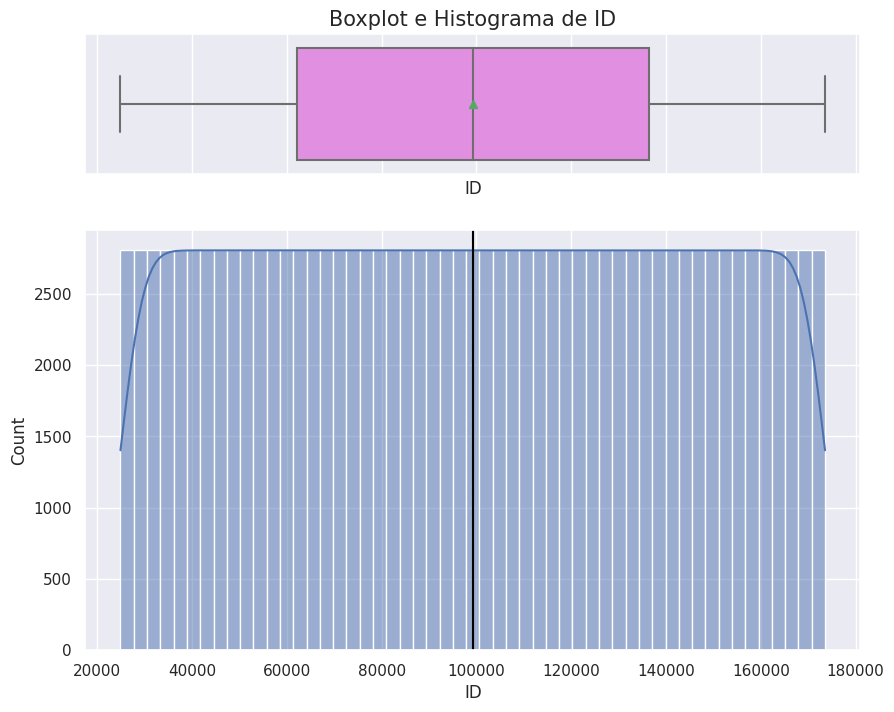

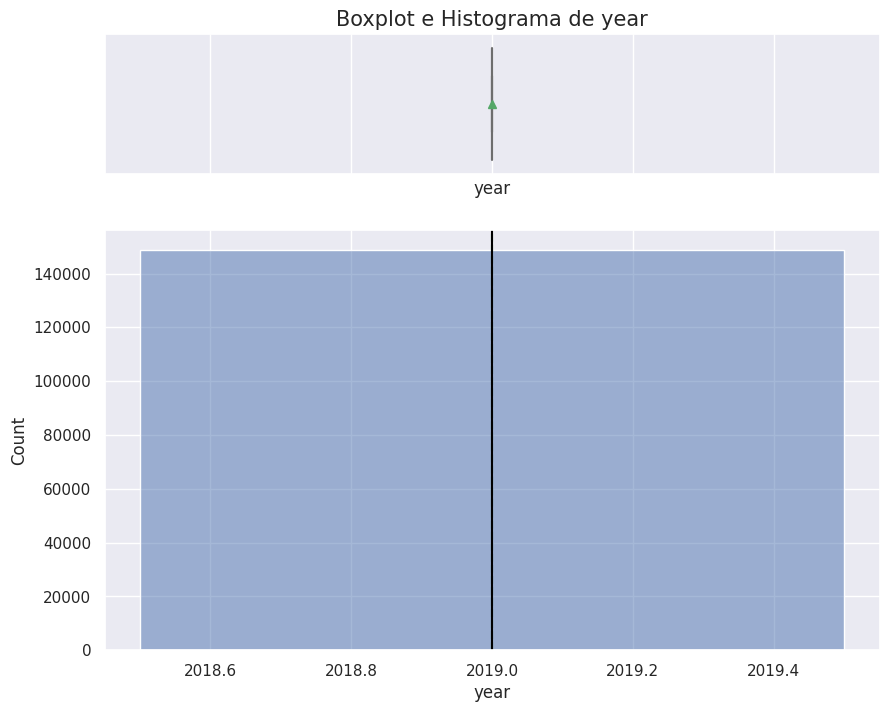

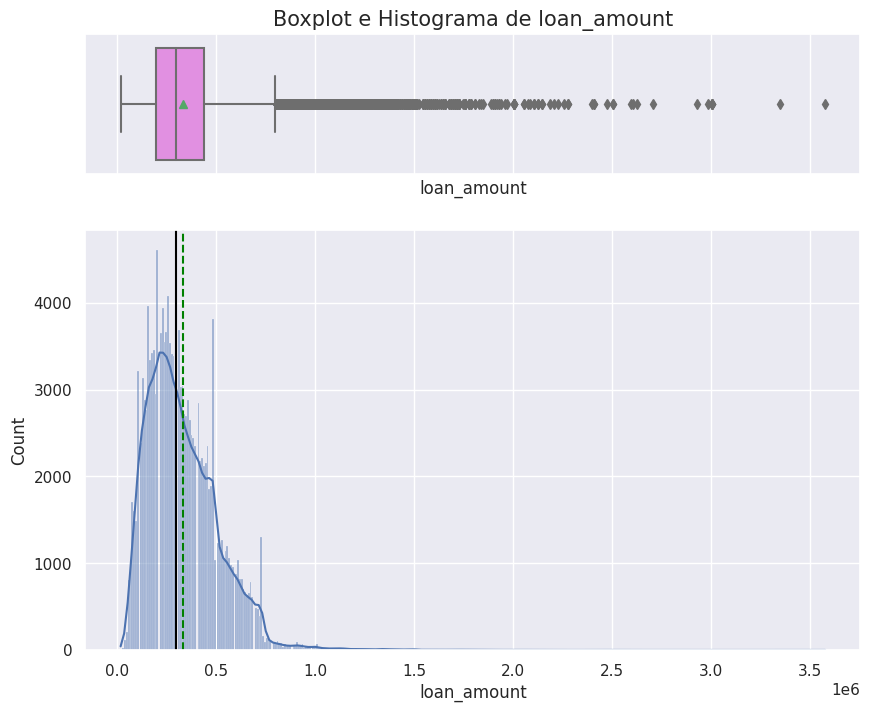

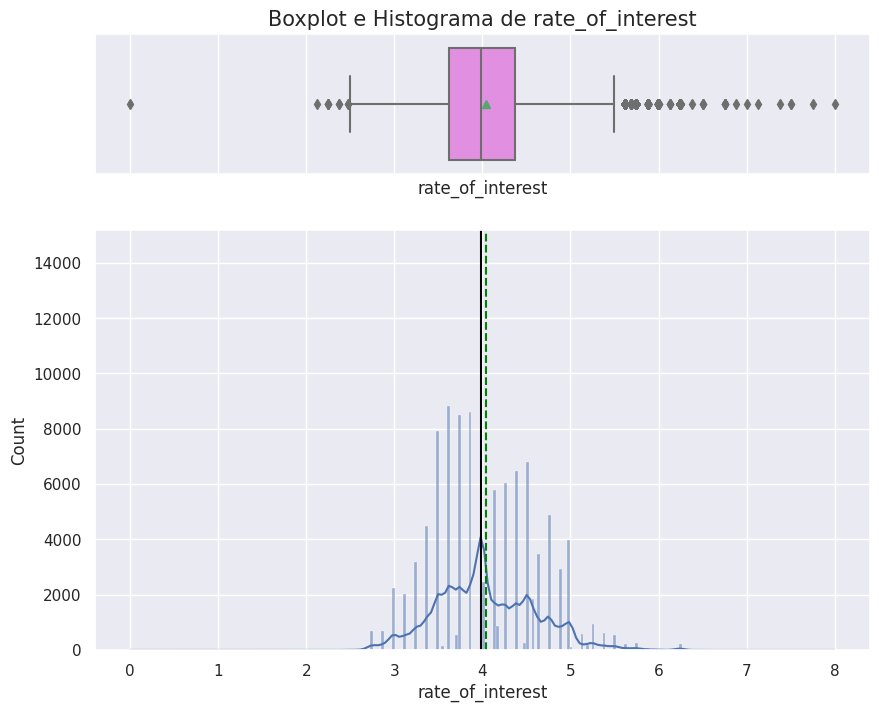

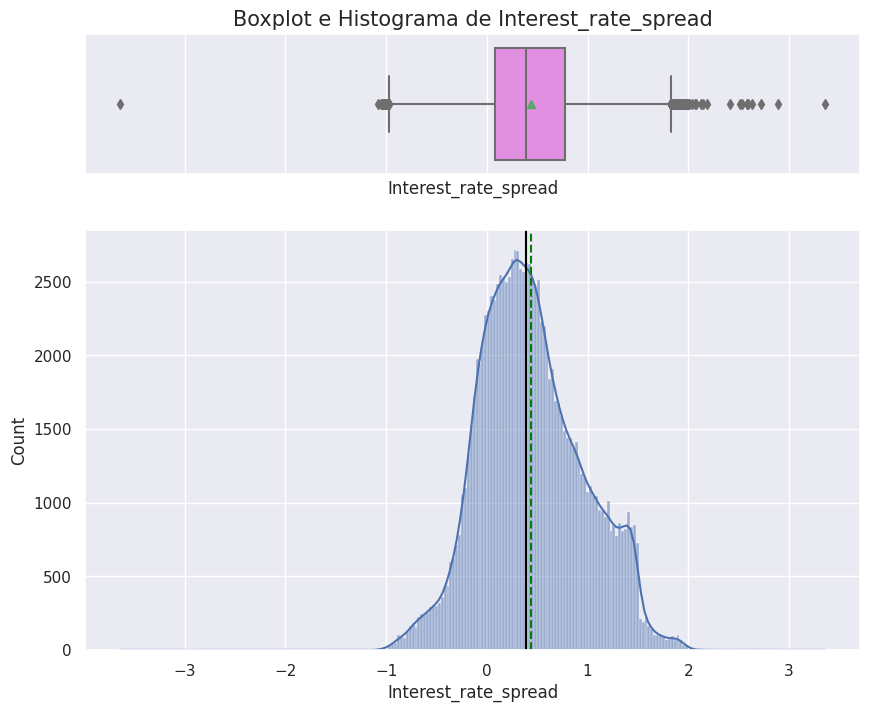

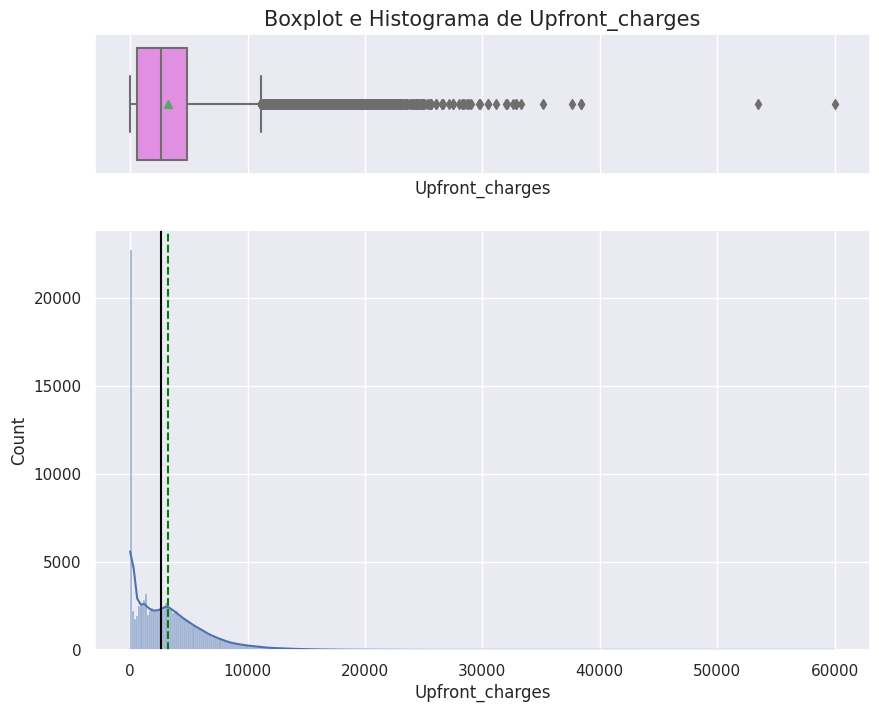

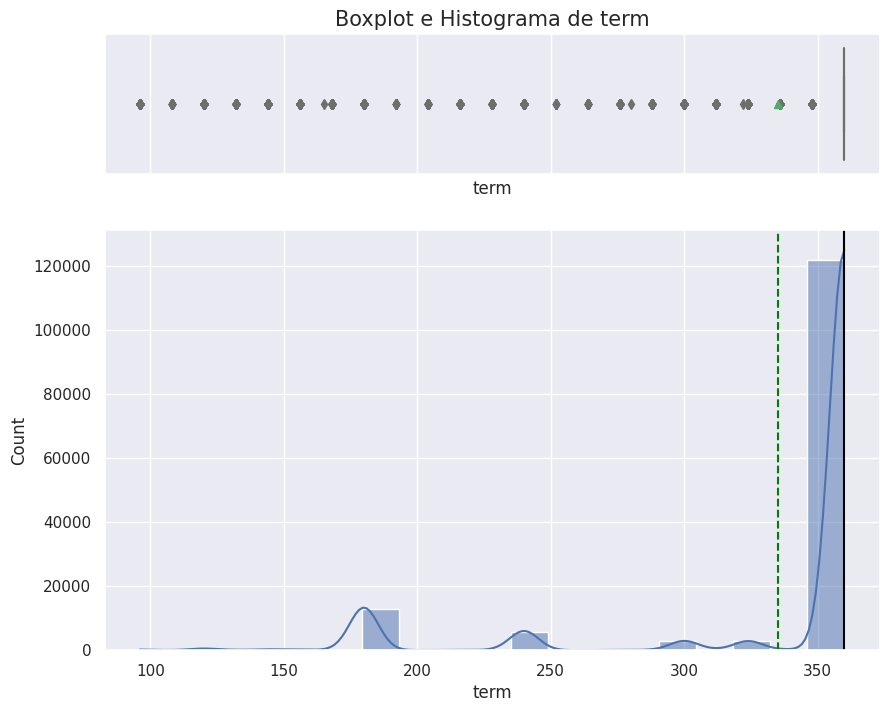

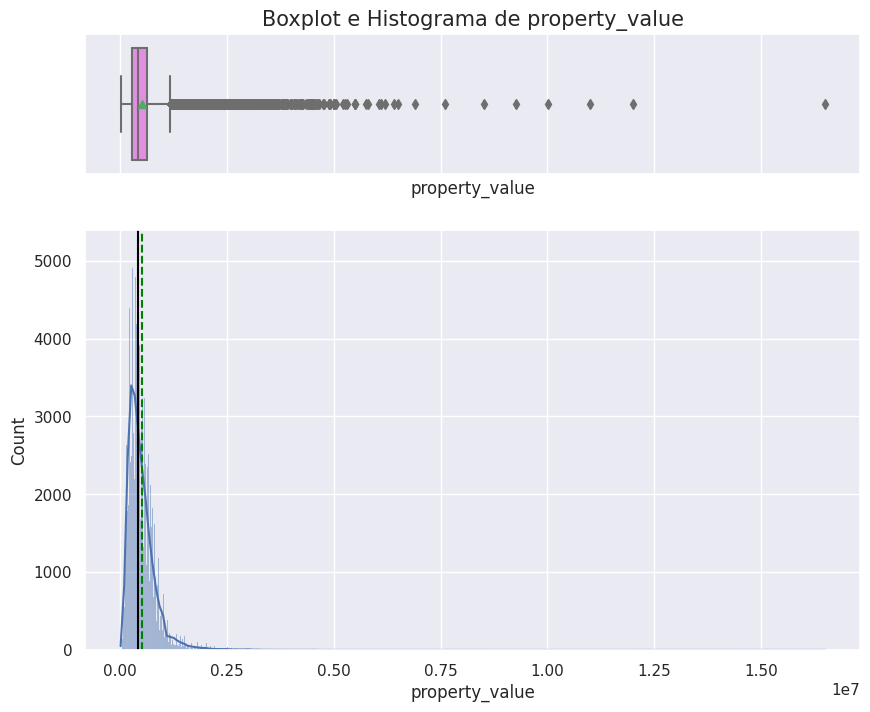

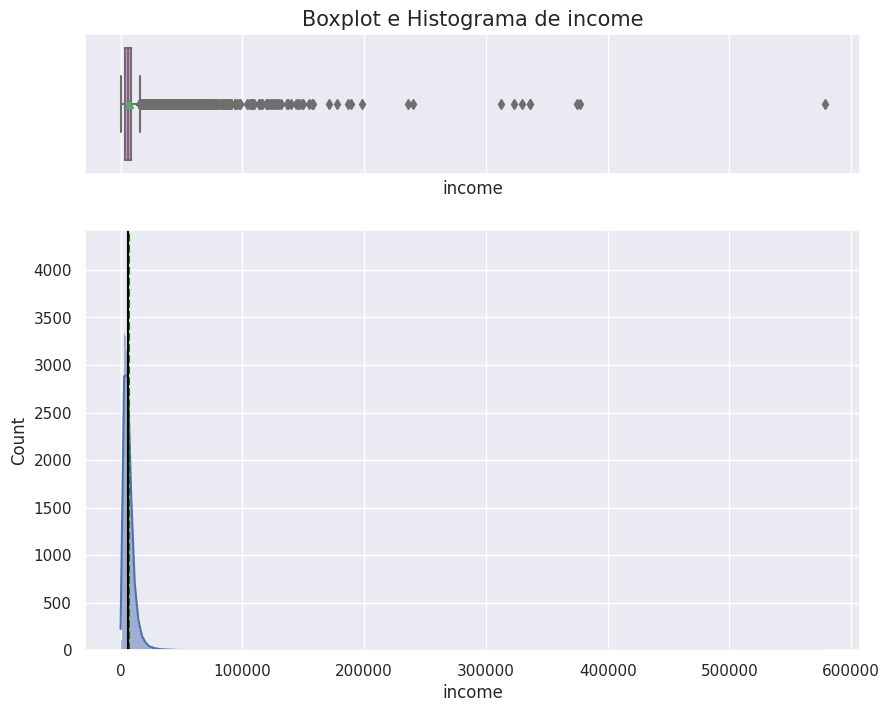

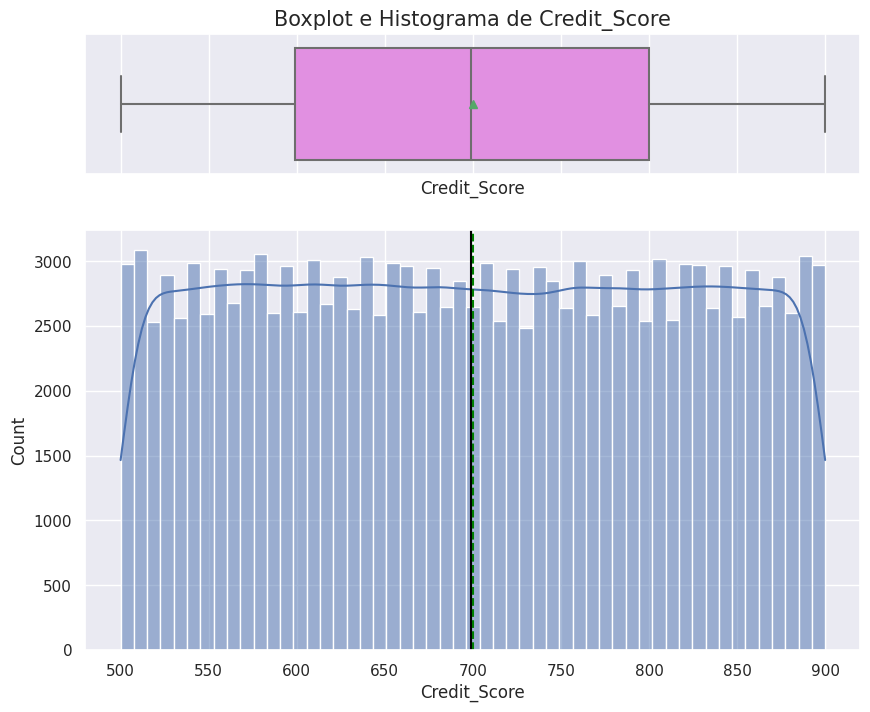

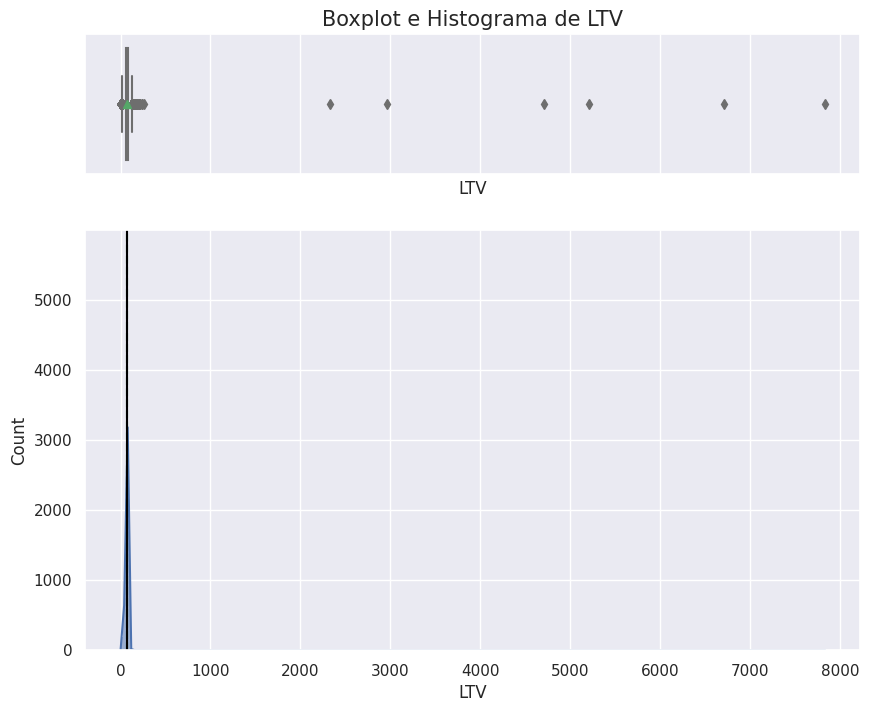

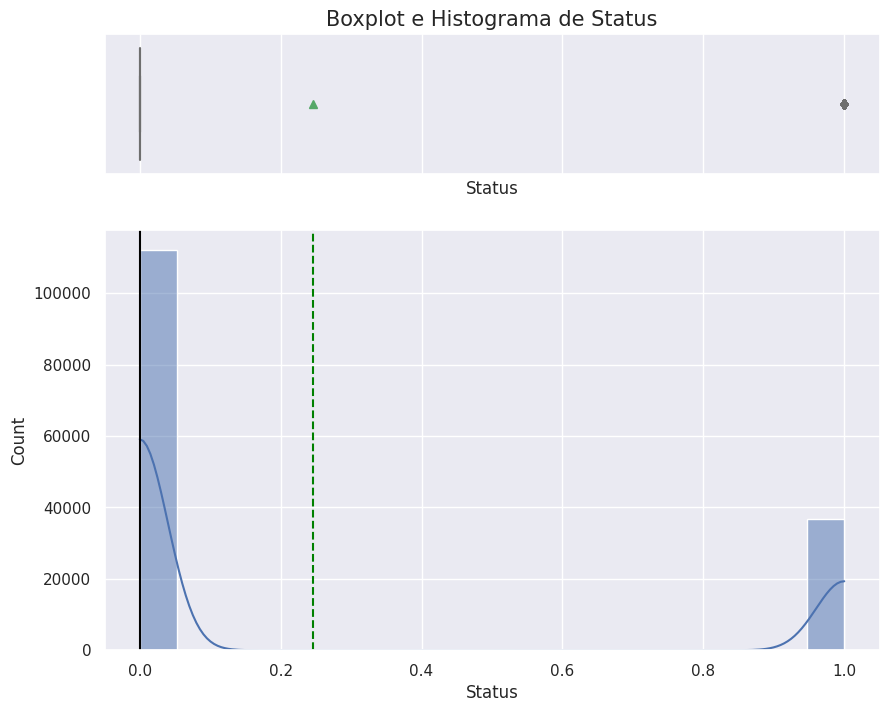

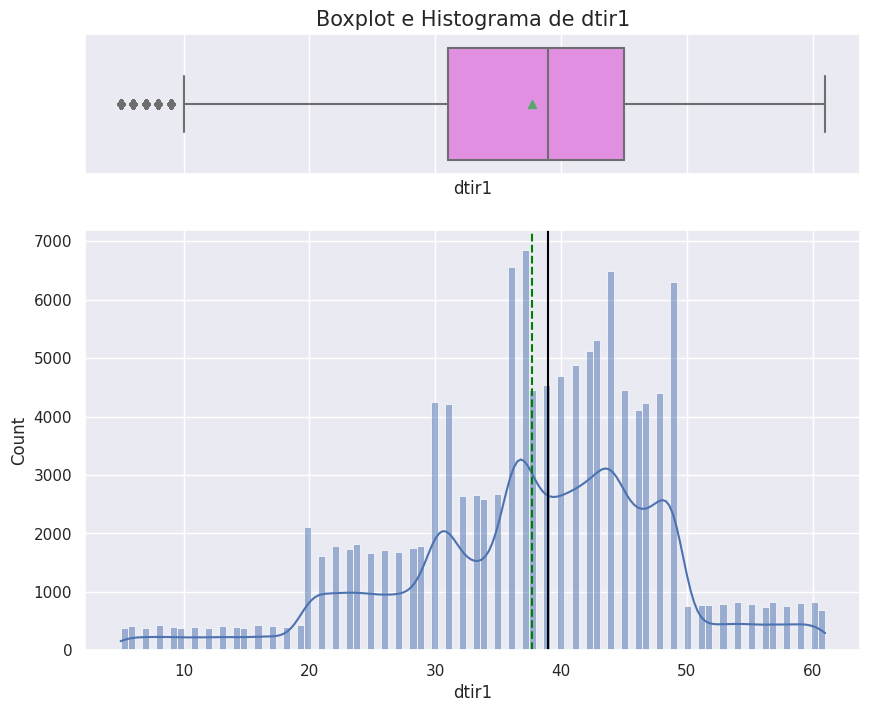

In [ ]:
# Mostrando los graficos de las variables numéricas
for i in df_numericas:
    plot_boxplot_histogram(data, i)

**Observaciones**
* La variable ID no nos da información relevante
* La variable year posee unicamente un solo valor y no nos proporciona información al modelo
* Observamos varias variables con una distribución con cola a la derecha

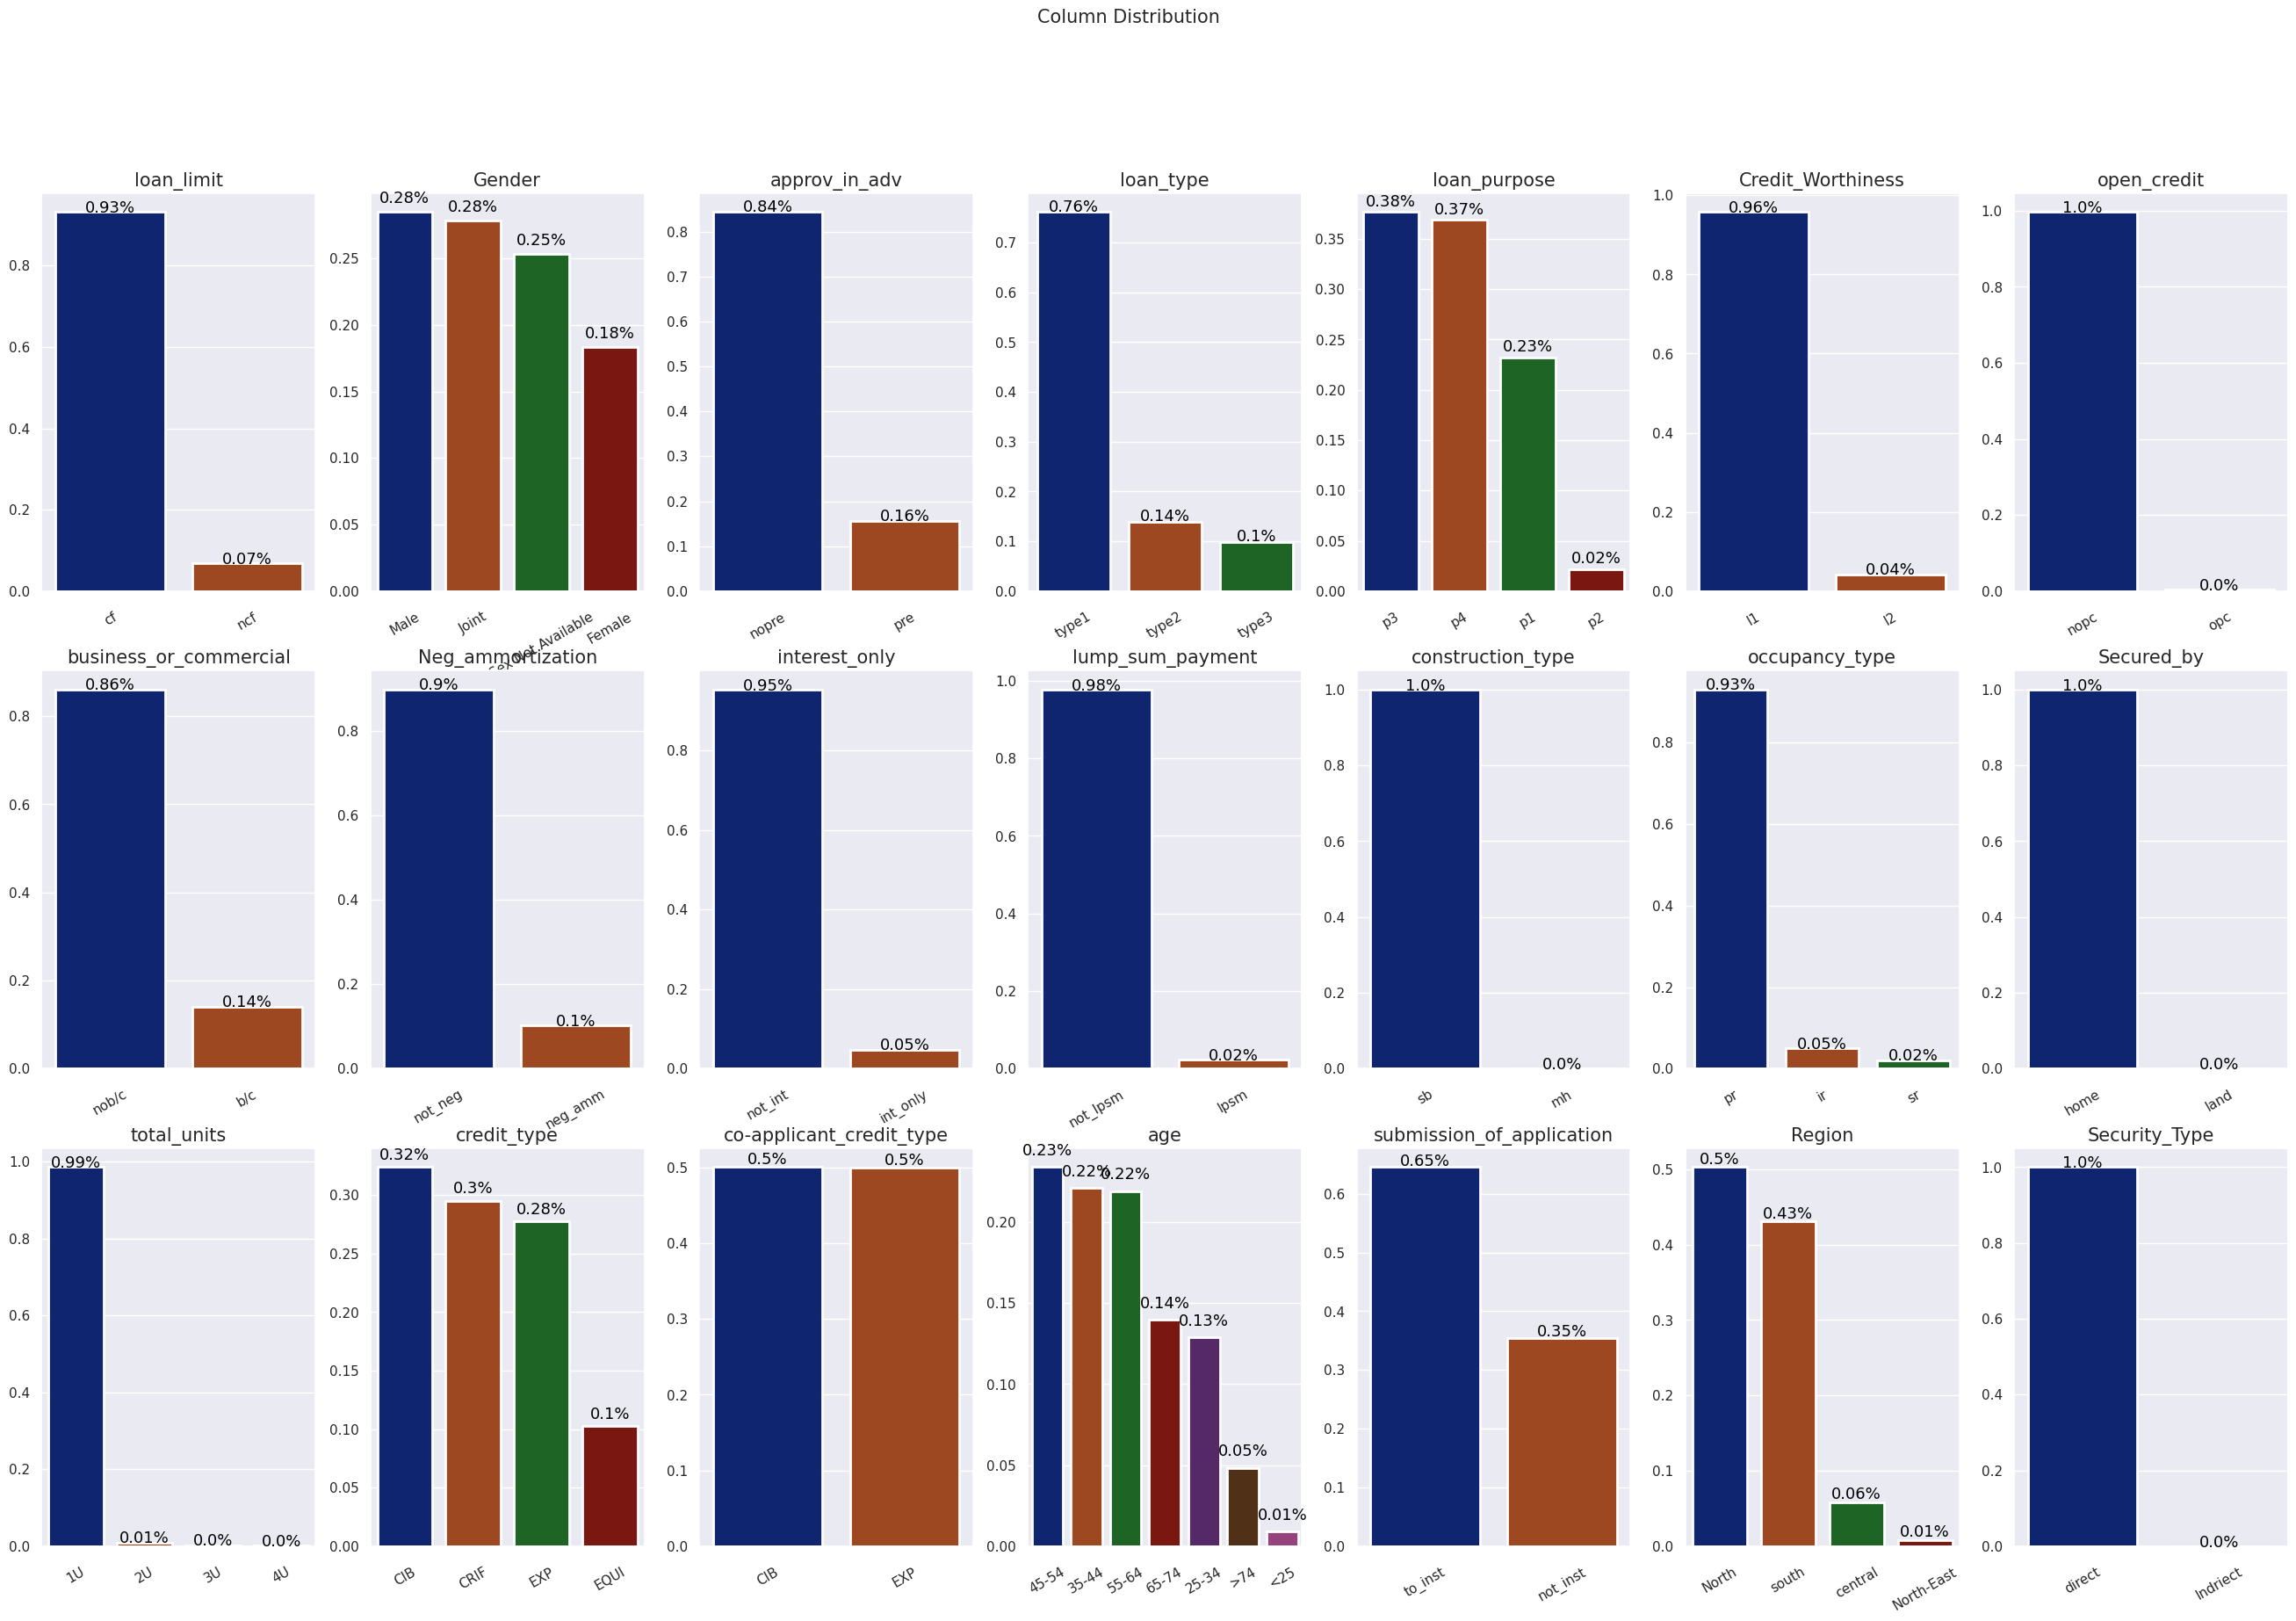

In [ ]:
# Mostrando los graficos de las variables categoricas
plot_categorical(data, 0.01)

* Se observa mucho desvalance por parte de algunas variables

In [ ]:
cols_delete = ["year","ID"]

In [ ]:
data = data.drop(columns=cols_delete)

In [ ]:
data.shape

(148670, 32)

In [ ]:
for i in data.select_dtypes(exclude=np.number).columns.tolist():
    print(i,'\n', data[i].value_counts(), '\n')

loan_limit 
 cf     135348
ncf      9978
Name: loan_limit, dtype: int64 

Gender 
 Male                 42346
Joint                41399
Sex Not Available    37659
Female               27266
Name: Gender, dtype: int64 

approv_in_adv 
 nopre    124621
pre       23141
Name: approv_in_adv, dtype: int64 

loan_type 
 type1    113173
type2     20762
type3     14735
Name: loan_type, dtype: int64 

loan_purpose 
 p3    55934
p4    54799
p1    34529
p2     3274
Name: loan_purpose, dtype: int64 

Credit_Worthiness 
 l1    142344
l2      6326
Name: Credit_Worthiness, dtype: int64 

open_credit 
 nopc    148114
opc        556
Name: open_credit, dtype: int64 

business_or_commercial 
 nob/c    127908
b/c       20762
Name: business_or_commercial, dtype: int64 

Neg_ammortization 
 not_neg    133420
neg_amm     15129
Name: Neg_ammortization, dtype: int64 

interest_only 
 not_int     141560
int_only      7110
Name: interest_only, dtype: int64 

lump_sum_payment 
 not_lpsm    145286
lpsm          33

* No tengo muchas clases en mis variables categoricas, por ello podría usar one hot econding y hacer mi muestreo al final antes de realizar el modelo

### Análisis bivariado

In [ ]:
# Manera 1
# matriz de correlaciones
corr_matrix = data.select_dtypes(include=['float64', 'int64']).corr()
corr_matrix.reset_index(inplace = True)
corr_matrix.rename(columns = {'index': 'feature', 'Status': 'correl'}, inplace = True)
corr_matrix

,feature,loan_amount,rate_of_interest,Interest_rate_spread,Upfront_charges,term,property_value,income,Credit_Score,LTV,correl,dtir1
0,loan_amount,1.000000,-0.150844,-0.377272,0.065556,0.174474,0.734249,0.456065,0.004438,0.038869,-0.036825,0.015029
1,rate_of_interest,-0.150844,1.000000,0.614908,-0.076473,0.209330,-0.122613,-0.041809,-0.001331,-0.000220,0.022957,0.055124
2,Interest_rate_spread,-0.377272,0.614908,1.000000,0.033037,-0.157139,-0.334571,-0.151333,-0.001738,0.040257,NaN,0.078178
3,Upfront_charges,0.065556,-0.076473,0.033037,1.000000,-0.054960,0.053043,0.016580,-0.001484,-0.031347,-0.019138,0.000115
4,term,0.174474,0.209330,-0.157139,-0.054960,1.000000,0.045117,-0.053785,-0.003149,0.106834,-0.000240,0.110572
5,property_value,0.734249,-0.122613,-0.334571,0.053043,0.045117,1.000000,0.414883,0.002430,-0.215102,-0.048864,-0.056288
6,income,0.456065,-0.041809,-0.151333,0.016580,-0.053785,0.414883,1.000000,0.000802,-0.066203,-0.065119,-0.267807
7,Credit_Score,0.004438,-0.001331,-0.001738,-0.001484,-0.003149,0.002430,0.000802,1.000000,-0.005533,0.004004,-0.000313
8,LTV,0.038869,-0.000220,0.040257,-0.031347,0.106834,-0.215102,-0.066203,-0.005533,1.000000,0.038895,0.156557
9,Status,-0.036825,0.022957,NaN,-0.019138,-0.000240,-0.048864,-0.065119,0.004004,0.038895,1.000000,0.078083


<Axes: xlabel='Interest_rate_spread', ylabel='Status'>

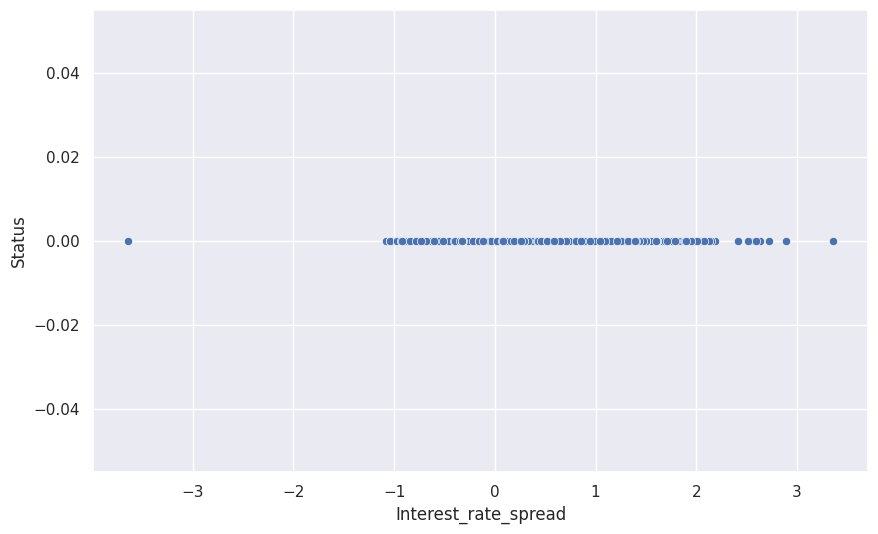

In [ ]:
# REVISAMOS PORQUE HA UNA CORRELACIÓN NaN ENTRE LA VARIABLE interest_rate_spread y el Status
sns.scatterplot(data=data, x='Interest_rate_spread', y='Status')

**Observaciones** 
* La variable "interest_rate_spread" solo tiene valores cuando el target es "0", Si la variable sólo tiene valores cuando el target es 0 y valores vacíos cuando el target es 1, puede ser que esta variable no esté relacionada con el target en sí, sino que sólo tenga valores en una situación particular.

In [ ]:
data = data.drop(['Interest_rate_spread'], axis=1)

In [ ]:
#matriz de correlaciones
corr_matrix = data.select_dtypes(include=['float64', 'int64']).corr()
corr_matrix.reset_index(inplace = True)
corr_matrix.rename(columns = {'index': 'feature', target: 'correl'}, inplace = True)

#Cruce
univariate_II = pd.merge(univariate, corr_matrix[['feature', 'correl']], on = 'feature', how = 'inner') 
univariate_II['correl_abs'] = univariate_II.correl.apply(lambda x: abs(x))
univariate_II.sort_values(by = 'correl_abs', ascending = False, inplace = True)
univariate_II

,feature,count,mean,std,min,Q1,median,Q3,max,missing_rate,correl,correl_abs
9,Status,148670.0,0.246445,0.430942,0.000000,0.00000,0.00000,0.000000,1.00,0.000000,1.000000,1.000000
2,dtir1,124549.0,37.732932,10.545435,5.000000,31.00000,39.00000,45.000000,61.00,0.162245,0.078083,0.078083
5,income,139520.0,6957.338876,6496.586382,0.000000,3720.00000,5760.00000,8520.000000,578580.00,0.061546,-0.065119,0.065119
3,property_value,133572.0,497893.465696,359935.315562,8000.000000,268000.00000,418000.00000,628000.000000,16508000.00,0.101554,-0.048864,0.048864
4,LTV,133572.0,72.746457,39.967603,0.967478,60.47486,75.13587,86.184211,7831.25,0.101554,0.038895,0.038895
7,loan_amount,148670.0,331117.743997,183909.310127,16500.000000,196500.00000,296500.00000,436500.000000,3576500.00,0.000000,-0.036825,0.036825
1,rate_of_interest,112231.0,4.045476,0.561391,0.000000,3.62500,3.99000,4.375000,8.00,0.245100,0.022957,0.022957
0,Upfront_charges,109028.0,3224.996127,3251.121510,0.000000,581.49000,2596.45000,4812.500000,60000.00,0.266644,-0.019138,0.019138
8,Credit_Score,148670.0,699.789103,115.875857,500.000000,599.00000,699.00000,800.000000,900.00,0.000000,0.004004,0.004004
6,term,148629.0,335.136582,58.409084,96.000000,360.00000,360.00000,360.000000,360.00,0.000276,-0.000240,0.000240


<Axes: >

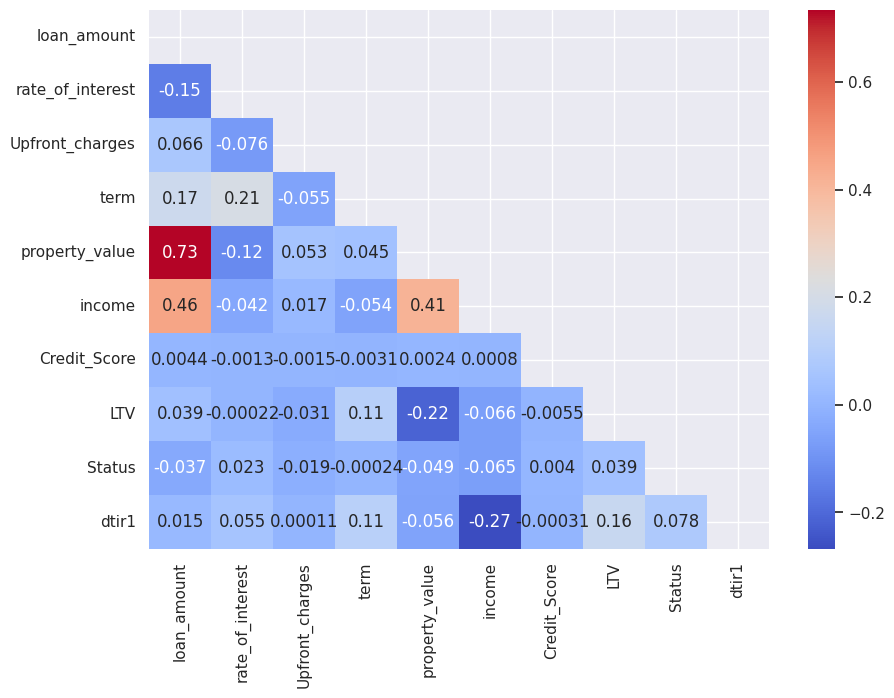

In [ ]:
# Manera 2
# Visualización de un headmap
plt.figure(figsize= (10,7))
correlaciones = data.select_dtypes(include=['float64', 'int64']).corr()
upp_mat = np.triu(correlaciones)        #upp_mat, crea una matriz triangular superior a la matriz dada
sns.heatmap(correlaciones, annot = True, cmap = 'coolwarm', mask = upp_mat) 

In [ ]:
# Me quedo solo con las columnas que apliquen mis condiciones y quitamos tambien la columna target
feature_prefilter = list(set(univariate_II.loc[univariate_II.correl_abs >= 0.1].loc[univariate_II.missing_rate <= 0.9].feature.tolist()) - set([target])) 
feature_prefilter

[]

In [ ]:
univariate_II

,feature,count,mean,std,min,Q1,median,Q3,max,missing_rate,correl,correl_abs
9,Status,148670.0,0.246445,0.430942,0.000000,0.00000,0.00000,0.000000,1.00,0.000000,1.000000,1.000000
2,dtir1,124549.0,37.732932,10.545435,5.000000,31.00000,39.00000,45.000000,61.00,0.162245,0.078083,0.078083
5,income,139520.0,6957.338876,6496.586382,0.000000,3720.00000,5760.00000,8520.000000,578580.00,0.061546,-0.065119,0.065119
3,property_value,133572.0,497893.465696,359935.315562,8000.000000,268000.00000,418000.00000,628000.000000,16508000.00,0.101554,-0.048864,0.048864
4,LTV,133572.0,72.746457,39.967603,0.967478,60.47486,75.13587,86.184211,7831.25,0.101554,0.038895,0.038895
7,loan_amount,148670.0,331117.743997,183909.310127,16500.000000,196500.00000,296500.00000,436500.000000,3576500.00,0.000000,-0.036825,0.036825
1,rate_of_interest,112231.0,4.045476,0.561391,0.000000,3.62500,3.99000,4.375000,8.00,0.245100,0.022957,0.022957
0,Upfront_charges,109028.0,3224.996127,3251.121510,0.000000,581.49000,2596.45000,4812.500000,60000.00,0.266644,-0.019138,0.019138
8,Credit_Score,148670.0,699.789103,115.875857,500.000000,599.00000,699.00000,800.000000,900.00,0.000000,0.004004,0.004004
6,term,148629.0,335.136582,58.409084,96.000000,360.00000,360.00000,360.000000,360.00,0.000276,-0.000240,0.000240


## 3. Procesamiento de datos


In [ ]:
df = data.copy()

### Tratamiento de variables numericas

#### Detección y tratamiento de valores atipicos

In [ ]:
# Ver el numero de variables numericas para crear el "x" y "y" de del subplot 
num_cols = df.select_dtypes(include=np.number).columns.tolist()
len(num_cols)

10

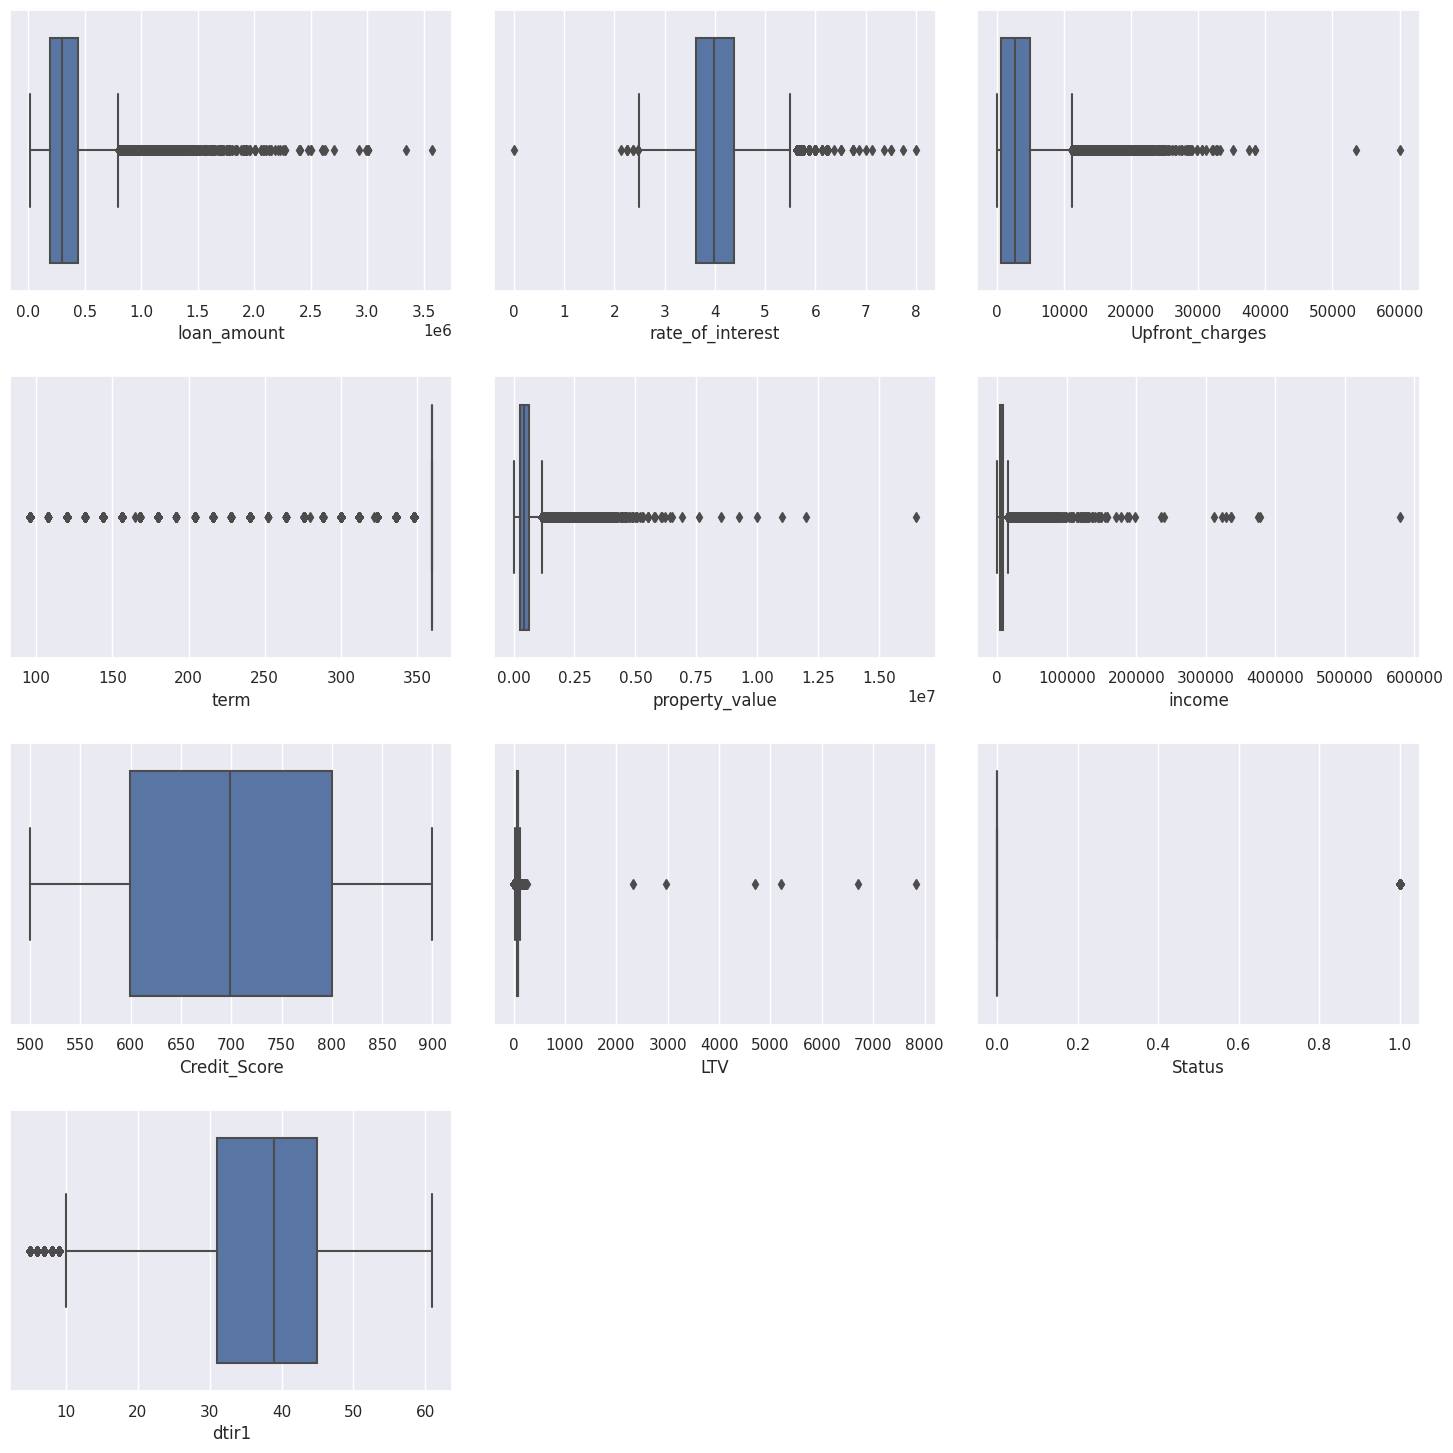

In [ ]:
# Visualización
plt.figure(figsize=(15, 15))

for i, variable in enumerate(num_cols):
    plt.subplot(4, 3, i + 1)
    sns.boxplot(data=df, x=variable)
    plt.tight_layout(pad=2)

plt.show()

In [ ]:
# Vamos a usar la tecnica de z-score con un porcentaje del 95%
# LI = Mean - Z*desviacion_estandar
# LS = Mean + Z*desviacion_estandar
# Z = 1.96 (95% confianza)

univariate_II['li_zscore'] = univariate_II['mean'] - 1.96*univariate_II['std']
univariate_II['ls_zscore'] = univariate_II['mean'] + 1.96*univariate_II['std']

univariate_II

,feature,count,mean,std,min,Q1,median,Q3,max,missing_rate,correl,correl_abs,li_zscore,ls_zscore
9,Status,148670.0,0.246445,0.430942,0.000000,0.00000,0.00000,0.000000,1.00,0.000000,1.000000,1.000000,-0.598202,1.091092e+00
2,dtir1,124549.0,37.732932,10.545435,5.000000,31.00000,39.00000,45.000000,61.00,0.162245,0.078083,0.078083,17.063880,5.840198e+01
5,income,139520.0,6957.338876,6496.586382,0.000000,3720.00000,5760.00000,8520.000000,578580.00,0.061546,-0.065119,0.065119,-5775.970433,1.969065e+04
3,property_value,133572.0,497893.465696,359935.315562,8000.000000,268000.00000,418000.00000,628000.000000,16508000.00,0.101554,-0.048864,0.048864,-207579.752805,1.203367e+06
4,LTV,133572.0,72.746457,39.967603,0.967478,60.47486,75.13587,86.184211,7831.25,0.101554,0.038895,0.038895,-5.590045,1.510830e+02
7,loan_amount,148670.0,331117.743997,183909.310127,16500.000000,196500.00000,296500.00000,436500.000000,3576500.00,0.000000,-0.036825,0.036825,-29344.503852,6.915800e+05
1,rate_of_interest,112231.0,4.045476,0.561391,0.000000,3.62500,3.99000,4.375000,8.00,0.245100,0.022957,0.022957,2.945149,5.145803e+00
0,Upfront_charges,109028.0,3224.996127,3251.121510,0.000000,581.49000,2596.45000,4812.500000,60000.00,0.266644,-0.019138,0.019138,-3147.202032,9.597194e+03
8,Credit_Score,148670.0,699.789103,115.875857,500.000000,599.00000,699.00000,800.000000,900.00,0.000000,0.004004,0.004004,472.672424,9.269058e+02
6,term,148629.0,335.136582,58.409084,96.000000,360.00000,360.00000,360.000000,360.00,0.000276,-0.000240,0.000240,220.654778,4.496184e+02


In [ ]:
# Extraigo las columnas para recorrerlas despues
columnas = univariate_II['feature'].tolist()
columnas

['Status',
 'dtir1',
 'income',
 'property_value',
 'LTV',
 'loan_amount',
 'rate_of_interest',
 'Upfront_charges',
 'Credit_Score',
 'term']

In [ ]:
# Tratamiento de outliers por Z-score

def zscore(dataframe, univariate, columnas):
    for col in columnas:
        desc = univariate.loc[univariate['feature'] == col]
        dataframe[col + '_tzscore'] = dataframe[col].apply(lambda x: desc.ls_zscore.values[0] if x > desc.ls_zscore.values[0]
                                                                else desc.li_zscore.values[0] if x < desc.li_zscore.values[0]
                                                                else x)
    return dataframe

In [ ]:
df = zscore(df, univariate_II, columnas)
df

,loan_limit,Gender,approv_in_adv,loan_type,loan_purpose,Credit_Worthiness,open_credit,business_or_commercial,loan_amount,rate_of_interest,...,Status_tzscore,dtir1_tzscore,income_tzscore,property_value_tzscore,LTV_tzscore,loan_amount_tzscore,rate_of_interest_tzscore,Upfront_charges_tzscore,Credit_Score_tzscore,term_tzscore
0,cf,Sex Not Available,nopre,type1,p1,l1,nopc,nob/c,116500,NaN,...,1,45.00000,1740.0,118000.0,98.728814,116500.000000,NaN,NaN,758,360.000000
1,cf,Male,nopre,type2,p1,l1,nopc,b/c,206500,NaN,...,1,NaN,4980.0,NaN,NaN,206500.000000,NaN,NaN,552,360.000000
2,cf,Male,pre,type1,p1,l1,nopc,nob/c,406500,4.560,...,0,46.00000,9480.0,508000.0,80.019685,406500.000000,4.560000,595.000000,834,360.000000
3,cf,Male,nopre,type1,p4,l1,nopc,nob/c,456500,4.250,...,0,42.00000,11880.0,658000.0,69.376900,456500.000000,4.250000,NaN,587,360.000000
4,cf,Joint,pre,type1,p1,l1,nopc,nob/c,696500,4.000,...,0,39.00000,10440.0,758000.0,91.886544,691579.991846,4.000000,0.000000,602,360.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
148665,cf,Sex Not Available,nopre,type1,p3,l1,nopc,nob/c,436500,3.125,...,0,48.00000,7860.0,608000.0,71.792763,436500.000000,3.125000,9597.194286,659,220.654778
148666,cf,Male,nopre,type1,p1,l1,nopc,nob/c,586500,5.190,...,0,17.06388,7140.0,788000.0,74.428934,586500.000000,5.145803,0.000000,569,360.000000
148667,cf,Male,nopre,type1,p4,l1,nopc,nob/c,446500,3.125,...,0,49.00000,6900.0,728000.0,61.332418,446500.000000,3.125000,1226.640000,702,220.654778
148668,cf,Female,nopre,type1,p4,l1,nopc,nob/c,196500,3.500,...,0,29.00000,7140.0,278000.0,70.683453,196500.000000,3.500000,4323.330000,737,220.654778


#### Tratamiento de valores missing

In [ ]:
# Verificación de valores nulos
df_num = df.select_dtypes(include=np.number).copy()
df.isna().sum()

loan_limit                    3344
Gender                           0
approv_in_adv                  908
loan_type                        0
loan_purpose                   134
Credit_Worthiness                0
open_credit                      0
business_or_commercial           0
loan_amount                      0
rate_of_interest             36439
Upfront_charges              39642
term                            41
Neg_ammortization              121
interest_only                    0
lump_sum_payment                 0
property_value               15098
construction_type                0
occupancy_type                   0
Secured_by                       0
total_units                      0
income                        9150
credit_type                      0
Credit_Score                     0
co-applicant_credit_type         0
age                            200
submission_of_application      200
LTV                          15098
Region                           0
Security_Type       

In [ ]:
na_cols = [cols for cols in df_num.columns]
for cols in na_cols:
    md = df[cols].mode()[0]
    df[cols] = df[cols].fillna(md)

* Debido a que son variables sesgadas vamos a proceder imputación por la moda

In [ ]:
# La mayoría de los valores de la columna están muy desequilibrados. Podemos aumentar los pesos uniendo valores de
# bajo peso en columnas para aumentar su peso acumulativo. Intentaríamos equilibrar distribuciones altamente desequilibradas para "edad, región y tipo de préstamo"